In [2]:
# ----------------------- Libraries required -----------------------
import sys, os
sys.path.append(os.pardir)
import math 
import warnings
warnings.filterwarnings('ignore')

# EDA / Data engineering
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default='iframe'

# import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline, Pipeline

# Validation/Model tuning
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

***
***
## Import data
***

In [4]:
# Load the date processed for model deployment (see TitianicSurvivalPrediction_EDA_model.ipynb)
df_full = pd.read_csv('data/data4model.csv')

***
***
## Pre-process data
***

In [15]:
df_select = df_full[['Survived', 'Age', 'Fare', 'Pclass', 'FamilySurvived', 'Ticket_label', 'Embarked_C', 'Embarked_S', 
                'Sex_female', 'Sex_male', 'Cabin_label_B', 'Cabin_label_C', 
                'Cabin_label_D', 'Cabin_label_E', 'Cabin_label_F', 'Cabin_label_U', 
                'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Royalty']]
df_select

,Survived,Age,Fare,Pclass,FamilySurvived,Ticket_label,Embarked_C,Embarked_S,Sex_female,Sex_male,...,Cabin_label_C,Cabin_label_D,Cabin_label_E,Cabin_label_F,Cabin_label_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,0.0,22.000000,7.2500,3,2.0,1.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1.0,38.000000,71.2833,1,2.0,2.0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1.0,26.000000,7.9250,3,1.0,1.0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1.0,35.000000,53.1000,1,2.0,2.0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,35.000000,8.0500,3,1.0,1.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,28.421211,8.0500,3,1.0,1.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1305,NaN,39.000000,108.9000,1,1.0,2.0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1306,NaN,38.500000,7.2500,3,1.0,1.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1307,NaN,28.421211,8.0500,3,1.0,1.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0


In [13]:
# Standardize the values
sc = StandardScaler()
df_select['Age'] = sc.fit_transform(df_select[['Age']])
df_select['Fare'] = sc.fit_transform(df_select[['Fare']])
df_select

,Age,Fare,Pclass,FamilySurvived,Ticket_label,Embarked_C,Embarked_S,Sex_female,Sex_male,Cabin_label_B,Cabin_label_C,Cabin_label_D,Cabin_label_E,Cabin_label_F,Cabin_label_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,-0.562751,-0.503265,3,2.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
1,0.643572,0.734759,1,2.0,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,-0.261170,-0.490215,3,1.0,1.0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0.417387,0.383202,1,2.0,2.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0.417387,-0.487798,3,1.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.078622,-0.487798,3,1.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
1305,0.718968,1.462043,1,1.0,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1306,0.681270,-0.503265,3,1.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
1307,-0.078622,-0.487798,3,1.0,1.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [18]:
# Split dataframe into train and test dataset
train = df_select[df_select['Survived'].notnull()]
test  = df_select[df_select['Survived'].isnull()].drop('Survived', axis=1) 

# Transform dataframe to numpy
X_train = train.drop('Survived', axis=1) # Feature variable
y_train = train['Survived'] # Survived label (0 or 1)
X_test = test

len(X_train.columns)

20

## Model Development

In [53]:
# Initialize model
nn_model = Sequential()
# Build layers
nn_model.add(Dense(12, activation='relu', input_dim=len(X_train.columns)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(12, activation='relu'))
nn_model.add(Dense(12, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# model deployment
nn_model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='acc')

# Show build model
nn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                252       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 13        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [54]:
log = nn_model.fit(X_train, y_train, epochs=5000, batch_size=32,verbose=1,
                callbacks=[EarlyStopping(monitor='val_loss',min_delta=0,patience=100,verbose=1)],
                validation_split=0.3)

Epoch 1/5000
20/20 [==============================] - 1s 15ms/step - loss: 0.9444 - acc: 0.6554 - val_loss: 0.6266 - val_acc: 0.7090
Epoch 2/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.8827 - acc: 0.6242 - val_loss: 0.6270 - val_acc: 0.7164
Epoch 3/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.7662 - acc: 0.6166 - val_loss: 0.6337 - val_acc: 0.6903
Epoch 4/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.7704 - acc: 0.6183 - val_loss: 0.6278 - val_acc: 0.6903
Epoch 5/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.7099 - acc: 0.6279 - val_loss: 0.6122 - val_acc: 0.6828
Epoch 6/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.6690 - acc: 0.6581 - val_loss: 0.6040 - val_acc: 0.6791
Epoch 7/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.7358 - acc: 0.6286 - val_loss: 0.6027 - val_acc: 0.6903
Epoch 8/5000
20/20 [==============================] - 0s 3ms/step - loss: 0

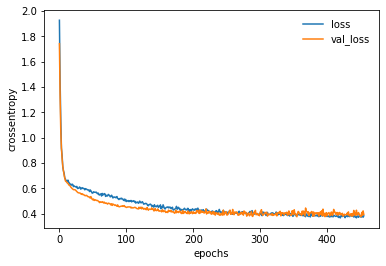

In [47]:
# Monitoring Learning steps
plt.plot(log.history['loss'],label='loss')
plt.plot(log.history['val_loss'],label='val_loss')
plt.legend(frameon=False)
plt.xlabel('epochs')
plt.ylabel('crossentropy')
plt.show()

In [48]:
# Prediction
prediction = nn_model.predict_classes(X_test)

prediction = prediction.reshape(-1)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
test_loss, test_acc = nn_model.evaluate(X_train, y_train, verbose=0)
test_acc

0.8563411831855774

## Deploy

In [44]:
df_test = pd.read_csv('data/test.csv')
PassengerId = df_test['PassengerId']

submission_nn = pd.DataFrame({"PassengerId": PassengerId, "Survived": prediction.astype(np.int32)})
submission_nn.to_csv("results/Titianic_NN_model.csv", index=False)